# Inference code for face detection algorthims

Download test image

In [60]:
!wget -O test-image.jpg "https://www.dropbox.com/s/cmf4bgwl559l4s2/face-detection-test-image.jpg?dl=1"

--2023-11-04 21:16:37--  https://www.dropbox.com/s/cmf4bgwl559l4s2/face-detection-test-image.jpg?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/cmf4bgwl559l4s2/face-detection-test-image.jpg [following]
--2023-11-04 21:16:38--  https://www.dropbox.com/s/dl/cmf4bgwl559l4s2/face-detection-test-image.jpg
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc3916508a7768a85c9a1e4e17a4.dl.dropboxusercontent.com/cd/0/get/CG5pWzG7a7SoaKMMaVIqwtcnCyQOd_9brcAmDC8-Hl6qf34DB428nWW_PUqmM2ovLs5nJ24e83ZerpAtxkzvEQKl9AaEzqYN0ZmX9lyFnJPHt2hXZweF5bwK4dzIyj4e1QEDLi21EbAArVIof9tFXAxG/file?dl=1# [following]
--2023-11-04 21:16:38--  https://uc3916508a7768a85c9a1e4e17a4.dl.dropboxusercontent.com/cd/0/get/CG5pWzG7a7SoaKMMaVIqwtcnCyQOd_9brcAmDC8-Hl6qf34

## 1. Haar Cascade - Viola-Jones Algorithm

The Viola-Jones face detector proposed by researchers Paul Viola and Michael Jones in 2001 signaled one of the first major breakthroughs in this field.

Employing the line or edge-detection features proposed in the Viola-Jones detector, Haar Cascades managed to provide the much-needed breakthrough in face detection. Though it significantly improved the speed and accuracy of the detections, it had its limitations and failed when called upon to detect faces in noisy images. Over the years, there have been many improvements. The Haar Cascade algorithm was used not only for Face Detection but also for Eye Detection, License Plate Detection etc.

### Import Dependencies

In [61]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the HaarCascade Face Detector



In [62]:
# Download Cascade classifier file
!wget "https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml"

--2023-11-04 21:16:39--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.05s   

2023-11-04 21:16:39 (19.5 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [63]:
image_path = '/content/test-image.jpg'

In [64]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# Initialize the cascade classifiers for face
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

### Inference

In [66]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = face_cascade.detectMultiScale(img, scaleFactor = 1.2, minNeighbors = 10)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: [[234  79  98  98]
 [109 146  98  98]
 [309 268  80  80]]
Inference time: 0.089s


### Display Detections

In [67]:
# Draw detections
if len(detections) > 0:
    for face in detections:
        cv2.rectangle(img,face,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

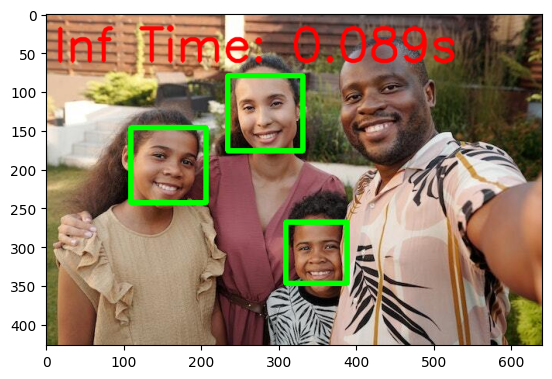

In [68]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 2. Dlib-HOG

A widely used Face Detector, Dlib uses the classical Histogram of Gradients (HoG) feature, combined with a linear classifier, an image pyramid and a sliding window detection scheme. Learn more about HoG in this post. It employs 5 HOG filters:

1. front looking
2. left looking
3. right looking
4. front looking, but rotated left
5. front looking, but rotated right

### Import Dependencies

In [69]:
import cv2
import dlib
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the Dlib Face Detector



In [70]:
# Initializing the Dlib Face Detector
detector = dlib.get_frontal_face_detector()

### Inference

In [71]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: rectangles[[(237, 93) (323, 179)], [(112, 146) (215, 250)], [(317, 285) (389, 357)], [(355, 51) (480, 176)]]
Inference time: 0.026s


### Display Detections

In [72]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = [detection.left(),detection.top(),detection.right()-detection.left(),detection.bottom()-detection.top()]
        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

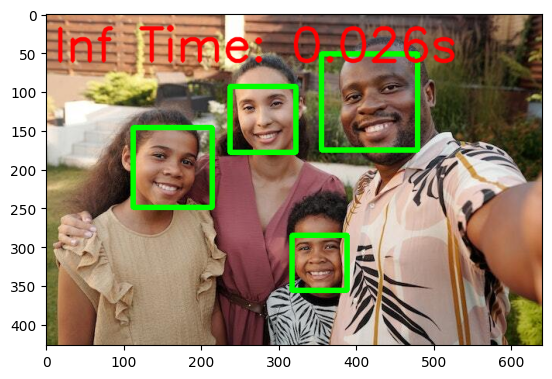

In [73]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

### 3. SSD

Single Shot detector the name of the model itself reveals most of the details about the model. Yes, the SSD model detects the object in a single pass over the input image, unlike other models, which traverse the image more than once to get an output detection.

### Import Dependencies

In [74]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the SSD Face Detector



In [75]:
!wget "https://github.com/spmallick/learnopencv/blob/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel?raw=true" -O res10_300x300_ssd_iter_140000_fp16.caffemodel
!wget "https://raw.githubusercontent.com/spmallick/learnopencv/master/FaceDetectionComparison/models/deploy.prototxt" -O deploy.prototxt

--2023-11-04 21:16:43--  https://github.com/spmallick/learnopencv/blob/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel?raw=true
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/spmallick/learnopencv/raw/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel [following]
--2023-11-04 21:16:43--  https://github.com/spmallick/learnopencv/raw/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/spmallick/learnopencv/master/FaceDetectionComparison/models/res10_300x300_ssd_iter_140000_fp16.caffemodel [following]
--2023-11-04 21:16:43--  https://raw.githubusercontent.com/spmallick/learnopencv/master/FaceDetectionC

In [76]:
detector = cv2.dnn.DetectionModel("res10_300x300_ssd_iter_140000_fp16.caffemodel", "deploy.prototxt")

### Inference

In [77]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: (array([1, 1, 1, 1], dtype=int32), array([0.99993074, 0.9996462 , 0.9994411 , 0.96231127], dtype=float32), array([[113, 143,  83, 107],
       [380,  43, 105, 143],
       [245,  70,  79, 111],
       [317, 260,  67, 100]], dtype=int32))
Inference time: 0.048s


### Display Detections

In [78]:
# Draw detections
if len(detections[2]) > 0:
    for face in detections[2]:
        cv2.rectangle(img,face,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

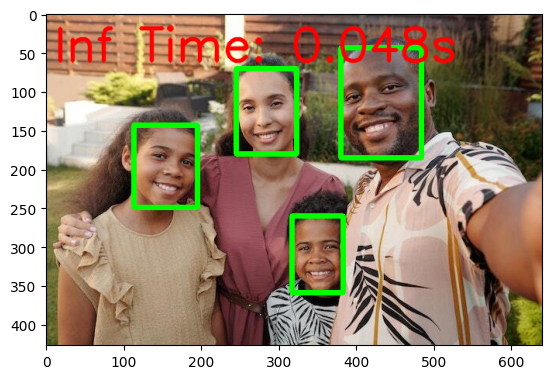

In [79]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 4.MTCNN

A more recent model, MTCNN stands for Multi-Task Cascaded Convolutional Neural Network. Published in 2016 by Zhang et al., this commonly used model consists of neural networks connected in a cascade fashion.

### Import Dependencies

In [80]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the MTCNN Face Detector



In [81]:
!pip install mtcnn

In [82]:
from mtcnn.mtcnn import MTCNN

In [83]:
detector=MTCNN()

### Inference

In [84]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect_faces(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

1/1 [==============================] - 0s 83ms/step


1/1 [==============================] - 0s 108ms/step
Detections: [{'box': [116, 146, 79, 99], 'confidence': 0.9999365210533142, 'keypoints': {'left_eye': (147, 184), 'right_eye': (183, 192), 'nose': (166, 203), 'mouth_left': (140, 217), 'mouth_right': (174, 224)}}, {'box': [373, 50, 109, 131], 'confidence': 0.9997994303703308, 'keypoints': {'left_eye': (396, 104), 'right_eye': (443, 95), 'nose': (417, 120), 'mouth_left': (403, 150), 'mouth_right': (451, 141)}}, {'box': [317, 272, 64, 83], 'confidence': 0.9996787905693054, 'keypoints': {'left_eye': (335, 303), 'right_eye': (365, 302), 'nose': (350, 316), 'mouth_left': (336, 333), 'mouth_right': (368, 332)}}, {'box': [244, 76, 76, 101], 'confidence': 0.9967352747917175, 'keypoints': {'left_eye': (262, 121), 'right_eye': (297, 115), 'nose': (280, 140), 'mouth_left': (267, 156), 'mouth_right': (303, 151)}}]
Inference time: 0.97s


### Display Detections

In [85]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection['box']
        # print("bbox:", pred_bbox)
        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

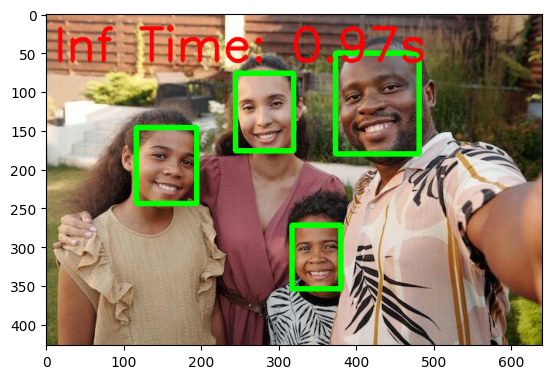

In [86]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 5. DSFD

Dual Shot Face Detector is a novel Face Detection approach that addresses the following three major aspects of Face Detection:

1. Better feature learning
2. Progressive loss design
3. Anchor assign-based data augmentation

### Import Dependencies

In [87]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Installing DSFD Pytorch

In [88]:
#!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git
!pip install face_detection

### Initializing the DSFD Face Detector



In [89]:
import face_detection

In [90]:
detector = face_detection.build_detector("DSFDDetector", confidence_threshold=.5, nms_iou_threshold=.3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


### Inference

In [91]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: [[379.68198     42.092083   485.11115    188.04192      0.99999726]
 [319.96753    262.56833    385.09412    357.9986       0.99989164]
 [246.47345     70.451454   322.55072    179.65974      0.9967892 ]
 [114.06098    145.25833    194.76791    247.86159      0.99526477]]
Inference time: 6.008s


### Display Detections

In [92]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection

        pred_bbox[2] = pred_bbox[2] - pred_bbox[0]
        pred_bbox[3] = pred_bbox[3] - pred_bbox[1]

        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

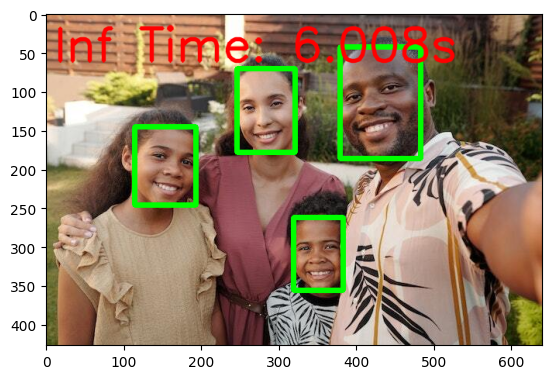

In [93]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 6. RetinaFace-MobileNetV1

RetinaFace is a practical single-stage SOTA face detector that was initially introduced in the arXiv technical report and then accepted by CVPR 2020. It is a part of the InsightFace project from DeepInsight, which is also credited with many more top Face-Recognition techniques like ArcFace, SubCenter ArcFace, PartialFC, and multiple facial applications too.

### Import Dependencies

In [94]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Installing DSFD Pytorch

In [95]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git

  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-zoilpa2a
  Running command git clone --filter=blob:none --quiet https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-zoilpa2a
  Resolved https://github.com/hukkelas/DSFD-Pytorch-Inference.git to commit fc1051d80936e3d7a6e34053bb5485c0a032e42e
  Preparing metadata (setup.py) ... done


### Initializing the RetinaNetMobileNetV1 Face Detector



In [96]:
import face_detection

In [97]:
detector = face_detection.build_detector("RetinaNetMobileNetV1", confidence_threshold=.5, nms_iou_threshold=.3)

### Inference

In [98]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: [[379.34692     38.839504   483.01038    188.25635      0.9997727 ]
 [114.5204     148.09135    195.1        249.60957      0.9944818 ]
 [316.5792     263.5287     387.26086    357.5579       0.99127734]
 [247.36421     78.68709    321.08295    179.98593      0.99066305]]
Inference time: 0.238s


### Display Detections

In [99]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection

        pred_bbox[2] = pred_bbox[2] - pred_bbox[0]
        pred_bbox[3] = pred_bbox[3] - pred_bbox[1]

        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

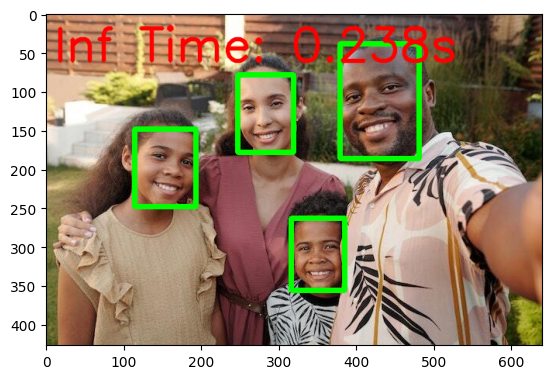

In [100]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 7. RetinaFace-ResNet50

RetinaFace is a practical single-stage SOTA face detector that was initially introduced in the arXiv technical report and then accepted by CVPR 2020. It is a part of the InsightFace project from DeepInsight, which is also credited with many more top Face-Recognition techniques like ArcFace, SubCenter ArcFace, PartialFC, and multiple facial applications too.

### Import Dependencies

In [101]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Installing DSFD Pytorch

In [102]:
!pip install git+https://github.com/hukkelas/DSFD-Pytorch-Inference.git

  Cloning https://github.com/hukkelas/DSFD-Pytorch-Inference.git to /tmp/pip-req-build-bjte0mbn
  Running command git clone --filter=blob:none --quiet https://github.com/hukkelas/DSFD-Pytorch-Inference.git /tmp/pip-req-build-bjte0mbn
  Resolved https://github.com/hukkelas/DSFD-Pytorch-Inference.git to commit fc1051d80936e3d7a6e34053bb5485c0a032e42e
  Preparing metadata (setup.py) ... done


### Initializing the RetinaNetResNet50 Face Detector



In [103]:
import face_detection

In [104]:
detector = face_detection.build_detector("RetinaNetResNet50", confidence_threshold=.5, nms_iou_threshold=.3)

### Inference

In [105]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
detections = detector.detect(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {detections}")
print(f"Inference time: {inf_time}s")

Detections: [[378.13934     44.98998    485.28995    185.38019      0.99988234]
 [243.88431     71.64284    322.65887    181.60893      0.9983889 ]
 [113.27999    148.45013    194.69052    249.41779      0.9960509 ]
 [318.95636    263.76508    387.8675     363.47586      0.99375993]]
Inference time: 1.087s


### Display Detections

In [106]:
# Draw detections
if len(detections) > 0:
    for detection in detections:
        # Converting predicted and ground truth bounding boxes to required format
        pred_bbox = detection

        pred_bbox[2] = pred_bbox[2] - pred_bbox[0]
        pred_bbox[3] = pred_bbox[3] - pred_bbox[1]

        pred_bbox = [int(i) for i in pred_bbox[:4]]

        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

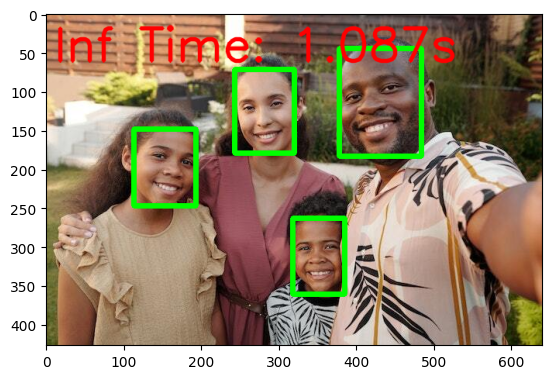

In [107]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## 8. MediaPipe

A framework for building perception pipelines that perform inferences over arbitrary sensory data, MediaPipe includes images, video streams, as well as audio data.

It can be used for rapid prototyping of perception pipelines with reusable components and in production-ready Machine Learning applications.

### Import Dependencies

In [108]:
import cv2
import time
from matplotlib import pyplot as plt
%matplotlib inline

### Initializing the MediaPipe Face Detector



In [109]:
!pip install mediapipe

In [110]:
import mediapipe as mp

In [111]:
mp_face_detection = mp.solutions.face_detection

detector = mp_face_detection.FaceDetection(min_detection_confidence=0.4)

### Inference

In [112]:
# Read image
img = cv2.imread(image_path)

# Save time
t0 = time.time()

# Getting the detections
predictions = detector.process(img)

# Calculate inference time
inf_time = round(time.time() - t0, 3)

# Print results
print(f"Detections: {predictions.detections}")
print(f"Inference time: {inf_time}s")

Detections: [label_id: 0
score: 0.6094543933868408
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.3830729126930237
    ymin: 0.20491835474967957
    width: 0.13635855913162231
    height: 0.20437797904014587
  }
  relative_keypoints {
    x: 0.4194721281528473
    y: 0.2712266445159912
  }
  relative_keypoints {
    x: 0.464762806892395
    y: 0.2761482000350952
  }
  relative_keypoints {
    x: 0.4323584735393524
    y: 0.32094812393188477
  }
  relative_keypoints {
    x: 0.4349316954612732
    y: 0.354748010635376
  }
  relative_keypoints {
    x: 0.4059632420539856
    y: 0.27036696672439575
  }
  relative_keypoints {
    x: 0.5091840624809265
    y: 0.27928870916366577
  }
}
, label_id: 0
score: 0.5471591353416443
location_data {
  format: RELATIVE_BOUNDING_BOX
  relative_bounding_box {
    xmin: 0.5829076170921326
    ymin: 0.162092924118042
    width: 0.17892354726791382
    height: 0.2681751847267151
  }
  relative_keypoints {
    x: 0.655

### Display Detections

In [113]:
# Draw detections
if predictions.detections:
    for detection in predictions.detections:
        # Converting predicted and ground truth bounding boxes to required format
        img_W = int(img.shape[1])
        img_H = int(img.shape[0])
        pred_bbox = detection.location_data.relative_bounding_box
        pred_bbox = [int(pred_bbox.xmin * img_W), int(pred_bbox.ymin * img_H), int(pred_bbox.width * img_W), int(pred_bbox.height * img_H)]
        print("bbox:", pred_bbox)
        cv2.rectangle(img,pred_bbox,(0,255,0),5)

# Write inference time
img = cv2.putText(img, f"Inf Time: {inf_time}s", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 2, (0, 0, 255), 3, cv2.LINE_AA)

bbox: [245, 87, 87, 87]
bbox: [373, 69, 114, 114]


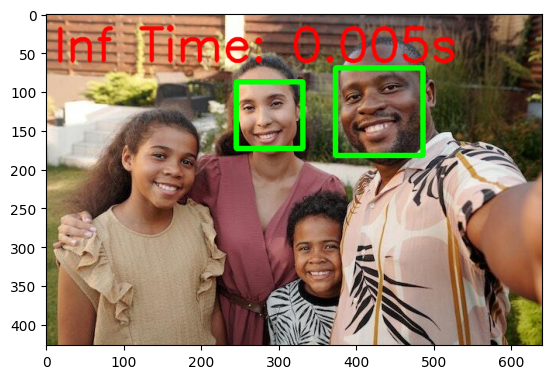

In [114]:
# Display image
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()